# __MOVIE RECOMMENDER SYSTEM__

![image](images/poster.jpeg)


### __INTRODUCTION__
In this exciting study, we explore the field of movie recommendations by utilizing the MovieLens dataset from the University of Minnesota's GroupLens research lab. The primary objective of our project is to create an advanced model that uses user ratings of previous films to suggest the top 5 movies to consumers. Throughout this presentation, we invite you to immerse yourself in the world of movie recommendations. We'll walk you through our model's intricacies, key findings, and demonstrate its prowess in suggesting movies tailored to individual tastes.

### Table of contents

- [Business Understanding](#PROJECT-OVERVIEW)
- [Data Understanding](#DATA-UNDERSTANDING)
- [Data Preprocessing](#DATA-PREPARATION)
- [Exploratory Data Analysis](#EXPLORATORY-DATA-ANALYSIS)
- [Generating a Recommendation System](#RECOMMENDATION-SYSTEM-GENERATION)
- [Conclusion and Recommendation](#Conclusion-and-Recommendation)

### __PROJECT OVERVIEW__
### __Business Understanding__
Movie Recommender Systems have evolved significantly over the years, playing a crucial role in enhancing user experience and driving business growth in the entertainment industry. Recommender systems date back to the late 20th century. In the early days, **collaborative filtering** was a prominent technique in which systems analyzed user behaviors and preferences to make recommendations. However, **scalability** and the **cold-start** problem (new items or users with limited data) were challenges. **Content-based filtering** emerged as an approach that considered item features and user preferences. Hybrid models, combining **collaborative** and **content-based** methods, gained popularity. Companies started integrating metadata like genre, director, and actor information to enhance recommendations.

Streaming platforms, such as Netflix, Hulu, and Amazon Prime Video, heavily rely on recommender systems. Personalization became a key business strategy, offering users tailored content suggestions based on their viewing history, ratings, and implicit feedback. While recommender systems offer numerous benefits, they also face challenges, including issues of bias, diversity, and privacy. Ensuring fair and unbiased recommendations has become a critical aspect of system development. The landscape continues to evolve with ongoing research in reinforcement learning, contextual recommendations, and explainability. Companies invest in AI research and development to stay competitive and enhance the overall user experience.

This movie recommendation system is designed to benefit the following stakeholders:

- **Users:** Movie enthusiasts seeking personalized movie suggestions based on their preferences and viewing history.
- **Streaming Platform:** The platform hosting the movie recommendation system, aiming to enhance user satisfaction and engagement.
- **Movie Production Studios:** Movie studios and content creators interested in understanding user preferences and trends to optimize their content offerings.

### __Problem Statement__
Current systems frequently struggle with inadequate personalization, providing generic recommendations that do not correspond with the tastes of specific users. This gap leads to user annoyance and diminished engagement, diminishing the potential for streaming platforms to increase user pleasure. Second, because there is a widespread issue with cold starts, the algorithm performs poorly when it comes to new users or movies because there is insufficient history data to make initial recommendations accurately. It is critical to address these problems in order to create a recommendation system that appeals to consumers, changes with their tastes, and offers a varied and interesting viewing experience.

### __Objectives__



**Main Objective:** To build a comprehensive movie recommendation system that leverages user ratings to provide personalized top 5 movie recommendations. The system will employ various approaches, including collaborative filtering, content-based filtering, model-based methods, and hybrid techniques, to enhance recommendation accuracy and coverage. The goal is to create a versatile and effective recommendation engine capable of understanding user preferences and delivering relevant movie suggestions.

Other Objectives:

1. To examine the distribution of movie ratings to better understand user preferences. Analyze the spread of ratings and identify any trends, such as common rating values or preferences for specific rating ranges.

2. To analyze user engagement on a monthly basis to identify trends and patterns. Explore the number of ratings submitted by users each month to understand seasonal variations and user activity over time.

3. To identify and analyze movies that have received the highest ratings and are also the most-watched by users.By combining these criteria, we gain insights into movies that are both critically acclaimed and widely appreciated by the audience.

### __DATA UNDERSTANDING__
The dataset (ml-latest-small) consists of 100,836 ratings and 3,683 tag applications across 9,742 movies. The data were generated by 610 users between March 29, 1996, and September 24, 2018.

The data used in this project will be pulled from 2 different separate files:

1. **Movies Data (movies.csv):**
Contains movie information, including titles and genres with the following columns:
 * `movieId`: Unique identifier for each movie.
 * `title`: The title of the movie, which also includes the year of release in parentheses.
 * `genres`: A pipe-separated list of genres to categorize the movie (e.g., Action|Adventure|Comedy).

2. **Ratings Data (ratings.csv):**
Contains user ratings on a 5-star scale for movies and has the following columns:
 * `userId`: ID representing the unique identifier for each user.
 * `movieId`: Unique identifier for each movie.
 * `rating`: User's rating for the movie on a 5-star scale with half-star increments (0.5 to 5.0).
 * `timestamp`: The timestamp when the rating was recorded, represented in seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.

 

The choice of movies.csv and ratings.csv datasets was because of the availability of critical information necessary for building our recommendation system. In this case, movie titles, genres, and movie IDs from the movies.csv and valuable user-specific information from ratings.csv, including user IDs, movie IDs, and ratings. 

Additionally, the common key between the two datasets is the movie ID, which enables a seamless merging of the datasets, creating a comprehensive dataset that encompasses both movie attributes and user interactions.


In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import calendar

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import sigmoid_kernel

from surprise.prediction_algorithms import SVD
from surprise.model_selection import train_test_split, cross_validate, GridSearchCV
from surprise import Dataset 
import random
from surprise.reader import Reader



Now, let's load our data and get started.

In [2]:
#/usr/bin/python

""" 
This function takes datasets' file paths as input,
loads them as dataframes, merges them on common column,
then outputs shape, columns, first five rows and summary of the merged dataframe.
"""
def load_and_examine(file_path_1, file_path_2):
    try:
        #Load the data
        df1 = pd.read_csv(file_path_1)
        df2 = pd.read_csv(file_path_2)
        data = pd.merge(df1, df2, on = "movieId" )
        
        #Display the shape, columns and first five rows of the dataset
        print("-" * 50, "Dataset Shape", "-" * 50)
        display(data.shape)
        print("-" * 50, "Dataset Columns", "-" * 50)
        display(data.columns)
        print("-" * 50, "Dataset Head", "-" * 50)
        display(data.head())
        
        #Display information about the dataset
        print("-" * 50, "Dataset Information", "-" * 50)
        display(data.info())

        return data
 
 
    except FileNotFoundError:
        print(f"File '{file_path_1}, {file_path_2}' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

file_path_1 = "data/movies.csv"
file_path_2 = "data/ratings.csv"
data = load_and_examine(file_path_1, file_path_2)


-------------------------------------------------- Dataset Shape --------------------------------------------------


(100836, 6)

-------------------------------------------------- Dataset Columns --------------------------------------------------


Index(['movieId', 'title', 'genres', 'userId', 'rating', 'timestamp'], dtype='object')

-------------------------------------------------- Dataset Head --------------------------------------------------


movieId             title                                       genres  \
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
1        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
2        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
3        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
4        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   

   userId  rating   timestamp  
0       1     4.0   964982703  
1       5     4.0   847434962  
2       7     4.5  1106635946  
3      15     2.5  1510577970  
4      17     4.5  1305696483

-------------------------------------------------- Dataset Information --------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    100836 non-null  int64  
 1   title      100836 non-null  object 
 2   genres     100836 non-null  object 
 3   userId     100836 non-null  int64  
 4   rating     100836 non-null  float64
 5   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 5.4+ MB


None

### __DATA PREPARATION__
In this section, we will focus on four key aspects of data preparation: 
* Checking for missing values
* Handling duplicates
* Datatype Conversion
* Feature engineering

### __Missing Values__
One of the initial tasks in data cleaning involves identifying and addressing missing values. Missing values can occur for various reasons, and dealing with them appropriately is essential for maintaining the integrity of the dataset. 


In [3]:
# Checking for missing values in each column
missing_values = data.isna().sum()

for column, count in missing_values.items():
    print(f"The {column} column has {count} missing values")

The movieId column has 0 missing values
The title column has 0 missing values
The genres column has 0 missing values
The userId column has 0 missing values
The rating column has 0 missing values
The timestamp column has 0 missing values


From the cell above, our dataset has no missing values.

### __Duplicate Values__
Duplicate entries in a dataset can introduce biases and inaccuracies in the analysis. Identifying and removing duplicate rows is essential to ensure that each observation in the dataset is unique. This process is particularly important when working with user-generated data or data collected from multiple sources.

In [4]:
# Checking for duplicated rows
duplicated_rows = data.duplicated().sum()
print(f'The DataFrame has {duplicated_rows} duplicated rows.')

The DataFrame has 0 duplicated rows.


There are no duplicate values

### __Datatype Conversion__
The `timestamp` column was converted from int datatype to datetime.

In [5]:
#Converting 'timestamp' column to datetime type
data['timestamp'] = pd.to_datetime(data['timestamp'], unit = 's')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   movieId    100836 non-null  int64         
 1   title      100836 non-null  object        
 2   genres     100836 non-null  object        
 3   userId     100836 non-null  int64         
 4   rating     100836 non-null  float64       
 5   timestamp  100836 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 5.4+ MB


### __Feature Engineering__
In the following cell, we introduce two new columns, namely `hour` and `month`, to facilitate the examination of peak user engagement at different times of the day and across various months.

In [6]:
data['hour'] = data['timestamp'].dt.hour
data['month'] = data['timestamp'].dt.month
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   movieId    100836 non-null  int64         
 1   title      100836 non-null  object        
 2   genres     100836 non-null  object        
 3   userId     100836 non-null  int64         
 4   rating     100836 non-null  float64       
 5   timestamp  100836 non-null  datetime64[ns]
 6   hour       100836 non-null  int64         
 7   month      100836 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 6.9+ MB


Now the data is ready for EDA.


### __EXPLORATORY DATA ANALYSIS__

**Objective One-** To examine the distribution of movie ratings to better understand user preferences.


### __Rating Distribution__

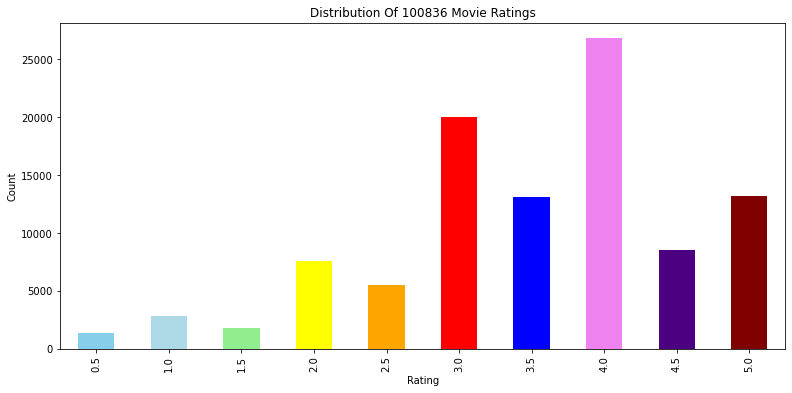

In [7]:
# count of each rating
rating_counts = data['rating'].value_counts().sort_index()

# colors for each bar
bar_colors = ['skyblue', 'lightblue', 'lightgreen', 'yellow', 'orange', 'red', 'blue', 'violet', 'indigo','maroon', 'green']

# bar graph
plt.figure(figsize=(13, 6))
ax = rating_counts.plot(kind='bar', color=bar_colors)
ax.set_xlabel('Rating')
ax.set_ylabel('Count')
ax.set_title('Distribution Of {} Movie Ratings'.format(data.shape[0]))
plt.show() 

Analyzing the distribution of movie ratings provides crucial insights into user sentiments and preferences within the movie recommendation system. Both the shape and spread of the distribution offer a snapshot of the user-base's collective opinion, indicating whether the majority tends to rate movies positively or if opinions are more diverse.

Understanding the rating distribution is paramount to refining recommendations, identifying trends, and enhancing the user experience.

### __Average Hourly Rating__

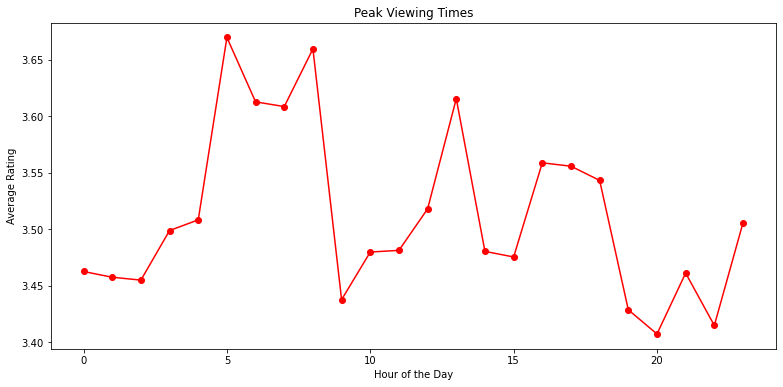

In [8]:
# Group by hour and calculate average rating
peak_viewing_times = data.groupby('hour')['rating'].mean()

# Plotting peak viewing time
plt.figure(figsize = (13, 6))
peak_viewing_times.plot(kind = 'line', marker = 'o', color = 'r', title = 'Peak Viewing Times')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Rating')
plt.show()


The visualization above represents average hourly rating and it provides insights into the average ratings of movies across different hours of the day. This analysis can be crucial for stakeholders, such as streaming platforms, movie studios, and advertisers, as it offers a nuanced understanding of user engagement patterns over time. 

By examining how ratings vary throughout the day, stakeholders can identify peak hours of user activity and tailor their strategies accordingly.

**Objective 2-** To analyze user engagement on a monthly basis to identify trends and patterns. Explore the number of ratings submitted by users each month to understand seasonal variations and user activity over time.


### __Monthly User Engagement__

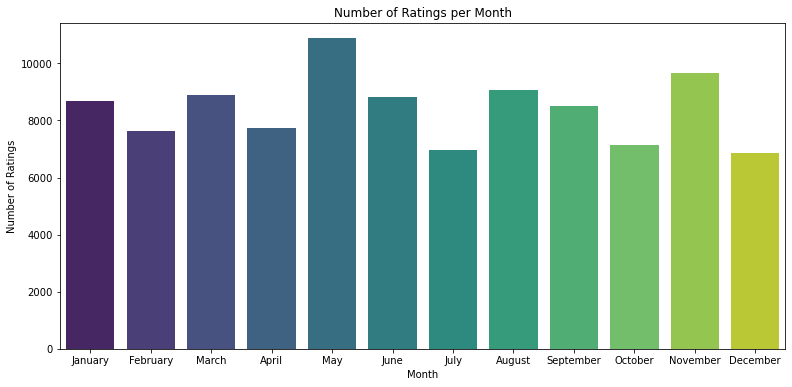

In [9]:
data['month_name'] = data['month'].apply(lambda x: calendar.month_name[x])

# Define the order of months
month_order = list(calendar.month_name)[1:]

# Convert 'month_name' to categorical with the specified order
data['month_name'] = pd.Categorical(data['month_name'], categories=month_order, ordered=True)

# Group by month and calculate the number of ratings
monthly_ratings_count = data.groupby('month_name')['rating'].count()

# Plotting the number of ratings per month with seaborn
plt.figure(figsize=(13, 6))
sns.barplot(x=monthly_ratings_count.index, y=monthly_ratings_count.values, palette='viridis')
plt.title('Number of Ratings per Month')
plt.xlabel('Month')
plt.ylabel('Number of Ratings')
plt.show()



The bar graph above explores user engagement by examining the number of ratings per month over a long period from **1970** to **2018**. It reveals distinct peaks in user activity during **May** and **November**, suggesting significant spikes in engagement during these months. The pronounced peaks in user engagement during May and November over this extended period may indicate recurring seasonal trends or annual events that consistently capture users' attention. Stakeholders can leverage this information to strategically plan and optimize platform activities, such as content releases, promotions, or community engagement initiatives, around these historically high-engagement months. Understanding the temporal dynamics of user behavior allows stakeholders to align their efforts with periods of heightened user interest, enhancing the overall effectiveness of platform-related activities and potentially improving user satisfaction and loyalty.

The long-term analysis of user engagement, provides valuable insights to stakeholders regarding historical trends and patterns in user interaction with the platform.

### __Top 5 Genres and Percentage Ratio.__

In [10]:
# checking different genres value count.

def find_genres(data):
    """
    Find and count genres in a movies DataFrame.

    """
    genres = {}  # dictionary to store different genre values

    for genre in data['genres']:
        words = genre.split('|')
        for word in words:
            genres[word] = genres.get(word, 0) + 1

    return genres

# usage:
genre_count = find_genres(data)
genre_count

{'Adventure': 24161,
 'Animation': 6988,
 'Children': 9208,
 'Comedy': 39053,
 'Fantasy': 11834,
 'Romance': 18124,
 'Drama': 41928,
 'Action': 30635,
 'Crime': 16681,
 'Thriller': 26452,
 'Horror': 7291,
 'Mystery': 7674,
 'Sci-Fi': 17243,
 'War': 4859,
 'Musical': 4138,
 'Documentary': 1219,
 'IMAX': 4145,
 'Western': 1930,
 'Film-Noir': 870,
 '(no genres listed)': 47}

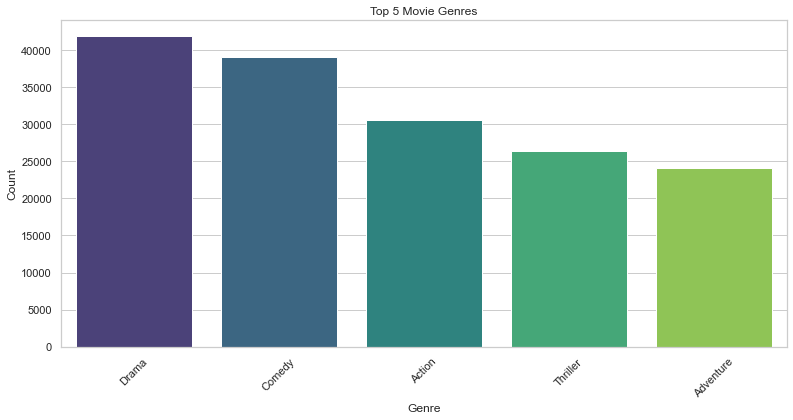

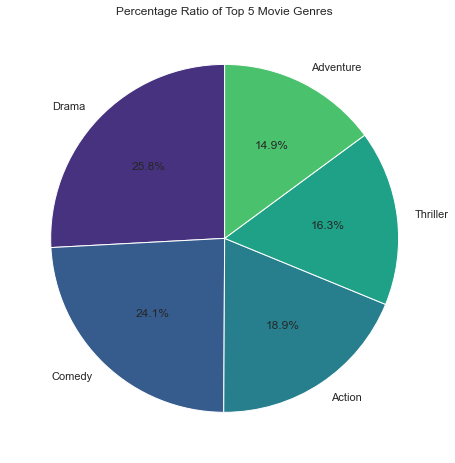

In [11]:
# visualization of top 5 genre and percentage ratio.

# Convert genre_count dictionary to a DataFrame
df_genre = pd.DataFrame(list(genre_count.items()), columns=['Genre', 'Count'])

# Sort DataFrame by Count in descending order
df_genre = df_genre.sort_values(by='Count', ascending=False)

# Select the top 5 genres
top5_genre = df_genre.head(5)


# Plotting
plt.figure(figsize=(13, 6))
sns.set(style="whitegrid")
sns.barplot(x='Genre', y='Count', data=top5_genre, palette="viridis")
plt.title('Top 5 Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Pie chart for percentage ratio
plt.figure(figsize=(15, 8))
plt.pie(top5_genre['Count'], labels = top5_genre['Genre'], autopct = '%1.1f%%', colors = sns.color_palette("viridis"), startangle = 90)
plt.title('Percentage Ratio of Top 5 Movie Genres')
plt.show()


From the above visualizations, Drama, Comedy, Action, Thriller, and Adventure are the top five genres based on the highest count of ratings. This implies a significant user preference for these genres. This suggests that these genres have a broad appeal and attract a larger audience, potentially reflecting mainstream tastes. While high ratings are a positive indicator of user satisfaction, the sheer volume of ratings for these genres indicates a consistent and widespread interest among users. 

Stakeholders can interpret this insight as an opportunity to prioritize and invest in content production and recommendations within these popular genres to cater to the majority of the user base and enhance overall platform engagement.

### __Top 5 Most Watched Movies.__

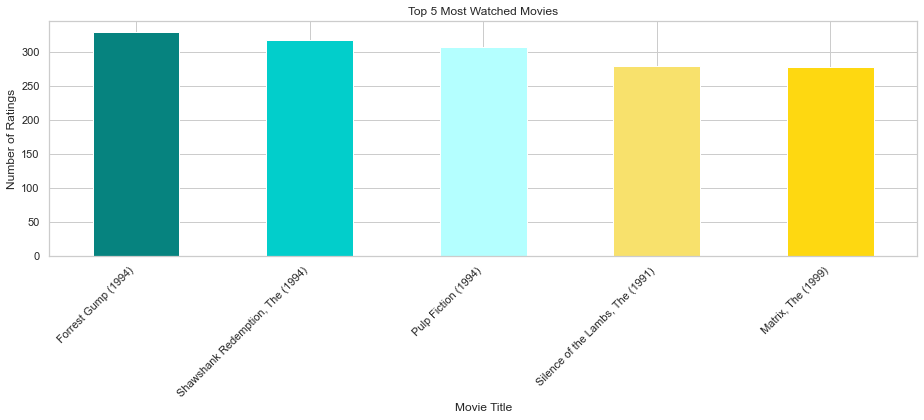

In [12]:
# Group by movie title and count the number of ratings, then sort in descending order
top_watched_movies = data.groupby('title')['rating'].count().sort_values(ascending=False).head()

# list of custom colors for the bars
custom_colors = ['#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811']

# bar plot to show top watched movies.
plt.figure(figsize=(13, 6))
ax = top_watched_movies.plot(kind='bar', color=custom_colors)
plt.title('Top 5 Most Watched Movies')
plt.xlabel('Movie Title')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

### __Visualization of Highest Rated Movies__

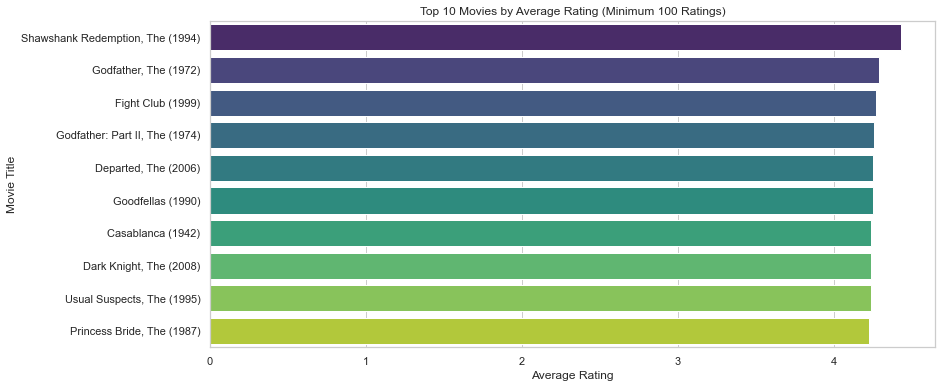

In [13]:
# Count the number of ratings for each movie
movie_ratings_count = data.groupby('title')['userId'].count().reset_index(name='num_ratings')

# Filter movies with at least a hundred ratings
popular_movies = movie_ratings_count[movie_ratings_count['num_ratings'] >= 100]

# Merge the original data with the filtered popular movies
filtered_data = pd.merge(data, popular_movies, on='title', how='inner')

# Calculate average ratings for each movie
average_ratings = filtered_data.groupby('title')['rating'].mean().reset_index()

# Rename the columns for clarity
average_ratings.columns = ['title', 'avg_rating']

# Sort the movies by average rating in descending order
average_ratings = average_ratings.sort_values(by='avg_rating', ascending=False)

# bar plot to visualize the top 10 movies by average rating
plt.figure(figsize=(13, 6))
sns.barplot(x="avg_rating", y="title", data=round(average_ratings.head(10), 2), palette="viridis")
plt.title("Top 10 Movies by Average Rating (Minimum 100 Ratings)")
plt.xlabel("Average Rating")
plt.ylabel("Movie Title")
plt.show()


The bar graph represents a visualization of theTop 10 highest rated movies. It provides insights into user preferences and the popularity of specific films on the platform. By analyzing the ratings, stakeholders can identify the movies that resonate most positively with the audience. This information is valuable for content curation, marketing strategies, and potentially influencing future production decisions. Additionally, the visualization allows stakeholders to recognize trends or patterns in user preferences, contributing to a better understanding of the platform's content landscape and aiding decision-making processes for recommendations and promotions.

**Objective 3-** To identify and analyze movies that have received the highest ratings and are also the most-watched by users.By combining these criteria, we gain insights into movies that are both critically acclaimed and widely appreciated by the audience.

### __Top 10 Movies by Combined Metric (Most Watched and Highest Rated)__

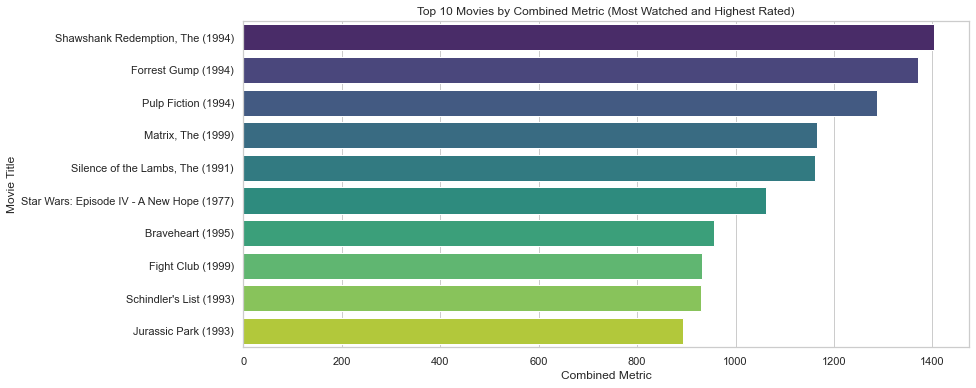

In [14]:
# Count the number of ratings for each movie
movie_ratings_count = data.groupby('title')['userId'].count().reset_index(name='num_ratings')

# Filter movies with at least a hundred ratings
popular_movies = movie_ratings_count[movie_ratings_count['num_ratings'] >= 100]

# Merge the original data with the filtered popular movies
filtered_data = pd.merge(data, popular_movies, on='title', how='inner')

# Calculate average ratings for each movie
average_ratings = filtered_data.groupby('title')['rating'].mean().reset_index()

# Calculate a combined metric (e.g., weighted sum of average rating and log-transformed number of ratings)
filtered_data['combined_metric'] = filtered_data['rating'] * (filtered_data['num_ratings'].apply(lambda x: min(1, x / 100)))  # Adjust the weight as needed

# Sort the movies by the combined metric in descending order
sorted_movies = filtered_data.groupby('title')['combined_metric'].sum().reset_index()
sorted_movies = sorted_movies.sort_values(by='combined_metric', ascending=False)

# bar plot to visualize the top 10 movies by the combined metric
plt.figure(figsize=(13, 6))
sns.barplot(x="combined_metric", y="title", data=sorted_movies.head(10), palette="viridis")
plt.title("Top 10 Movies by Combined Metric (Most Watched and Highest Rated)")
plt.xlabel("Combined Metric")
plt.ylabel("Movie Title")
plt.show()


Creating a combined metric for the top 10 movies based on both the number of views and the highest ratings offers valuable insights into user preferences and overall popularity. The above visualization highlights movies that not only attract a significant audience but also manage to maintain high user satisfaction. The intersection of most-watched and highly-rated movies signifies a sweet spot where a film captures widespread attention while delivering a positive viewing experience. Stakeholders can use this information to identify blockbuster hits that resonate with a broad audience and potentially leverage these insights for marketing, content creation, or strategic decision-making. It also helps in understanding the correlation between popularity and user satisfaction, guiding future content recommendations and system improvements.

After completing the exploratory data analysis (EDA), we have gained insights into the underlying patterns within the data. With this understanding, we are ready to initiate the construction of our recommendation systems.

## __RECOMMENDATION SYSTEM GENERATION__
Let's start with **content-based filtering**.

### __CONTENT-BASED FILTERING__
Content-based filtering using genres adds a valuable dimension to the recommendation system, offering personalized suggestions rooted in the thematic characteristics of movies. This approach complements collaborative filtering methods, contributing to a more robust and accurate movie recommendation system.

The `Class` below, MovieRecommendation, encapsulates the functionalities for movie recommendations. The __init__ method initializes the object with the movie DataFrame (df), sigmoid kernel matrix (sig), and indices mapping (indices). The give_rec method provides movie recommendations based on a given title, utilizing the sigmoid kernel matrix and indices mapping. The get_title method retrieves movie title and genres based on text input. The class allows for organized and modular movie recommendation operations.

In [15]:
class MovieRecommendation:
    def __init__(self, df, sig, indices):
        """
        Initialize the MovieRecommendation object.

        Parameters:
        - df (DataFrame): The movie DataFrame.
        - sig (array): The sigmoid kernel matrix representing content similarity.
        - indices (Series): The index mapping for movie titles.

        Returns:
        - None
        """
        self.df = df
        self.sig = sig
        self.indices = indices

    def give_rec(self, title):
        """
        Get movie recommendations based on title.

        Parameters:
        - title (str): The title of the movie for which recommendations are sought.

        Returns:
        - DataFrame: Top 10 recommended movies with similar content.
        """
        try:
            # Get title and genres using the input
            title, genres = self.get_title(title)
            
            # Print information about the input movie
            if title:
                print(f"Recommendation for {title}")
                print("Genres: ", genres)
            
            # Get the index of the input movie
            idx = self.indices[title]
            
            # Get pairwise similarity scores for the input movie
            sig_scores = list(enumerate(self.sig[idx]))

            # Sort the movies based on similarity scores
            sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)

            # Retrieve the indices of the top 10 most similar movies
            n = int(input('How many recommendations do you need? '))
            sig_scores = sig_scores[1:n+2]
            movie_indices = [i[0] for i in sig_scores]

            # Return the DataFrame of top 10 recommended movies
            return self.df.iloc[movie_indices].drop_duplicates()

        except Exception as e:
            print(e)
            return "Error!!!"

    def get_title(self, text=None):
        """
        Get movie title and genres based on text input.

        Parameters:
        - text (str): Optional text input for movie name.

        Returns:
        - tuple: (title, genres) of the movie.
        """
        text = str(input('Enter a movie name: ')) if text is None else text
        mask = self.df['title'].str.contains(text, case=False, regex=False)
        title = self.df.loc[mask, 'title'].head(1).values[0] if any(mask) else None
        
        if not title:
            print("Please enter a valid title !!!")
            return None, None

        return title, self.df.loc[mask].head(1)["genres"].values[0]

In [16]:
data['genres']

0         Adventure|Animation|Children|Comedy|Fantasy
1         Adventure|Animation|Children|Comedy|Fantasy
2         Adventure|Animation|Children|Comedy|Fantasy
3         Adventure|Animation|Children|Comedy|Fantasy
4         Adventure|Animation|Children|Comedy|Fantasy
                             ...                     
100831                Action|Animation|Comedy|Fantasy
100832                       Animation|Comedy|Fantasy
100833                                          Drama
100834                               Action|Animation
100835                                         Comedy
Name: genres, Length: 100836, dtype: object

In the cell below, the dataset is preprocessed to create a unique subset of movies by removing duplicate entries based on the 'movieId' and keeping only the first occurrence. Subsequently, a TfidfVectorizer is employed to transform the textual information in the 'genres' column into a numerical representation, considering unigrams, bigrams, and trigrams while excluding terms that appear in fewer than three documents and removing common English stop words. NaN values in the 'genres' column are replaced with empty strings, and pipe separators are substituted with commas. The resulting 'genres' column is then displayed to verify the successful preprocessing steps, setting the stage for further content-based filtering using genre information for a recommendation system in a project.

In [17]:
# Remove duplicate rows based on 'movieId', keeping the first occurrence
df_unique = data.drop_duplicates(subset='movieId', keep='first')

# Initialize a TfidfVectorizer with specified parameters
tfv = TfidfVectorizer(
    min_df=3,                # Ignore terms that appear in less than 3 documents
    max_features=None,        # No limit on the number of features
    strip_accents='unicode',  # Unicode text normalization
    analyzer='word',          # Analyze words
    token_pattern=r'\w{1,}',   # Regular expression for extracting words
    ngram_range=(1, 3),       # Include unigrams, bigrams, and trigrams
    stop_words='english'      # Remove common English stop words
)

# Fill NaN values in the 'genres' column with an empty string
df_unique['genres'] = df_unique['genres'].fillna('')

# Replace the pipes '|' from the 'genres' column with commas
df_unique['genres'] = df_unique['genres'].map(lambda x: ", ".join(x.split("|")))

# Display the genres column after preprocessing
df_unique['genres'].head()


<ipython-input-17-659ebd598639>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['genres'] = df_unique['genres'].fillna('')
<ipython-input-17-659ebd598639>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['genres'] = df_unique['genres'].map(lambda x: ", ".join(x.split("|")))


0      Adventure, Animation, Children, Comedy, Fantasy
215                       Adventure, Children, Fantasy
325                                    Comedy, Romance
377                             Comedy, Drama, Romance
384                                             Comedy
Name: genres, dtype: object

In [18]:
# Transform the 'genres' column into a TF-IDF matrix
tfv_matrix = tfv.fit_transform(df_unique['genres'])
tfv_matrix

<9724x401 sparse matrix of type '<class 'numpy.float64'>'
	with 42793 stored elements in Compressed Sparse Row format>

In [19]:
# Compute the sigmoid kernel
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

In [20]:
new_df = df_unique.drop(columns=['timestamp', 'hour', 'month', 'month_name'], axis=1)
new_df.head()

movieId                               title  \
0          1                    Toy Story (1995)   
215        2                      Jumanji (1995)   
325        3             Grumpier Old Men (1995)   
377        4            Waiting to Exhale (1995)   
384        5  Father of the Bride Part II (1995)   

                                              genres  userId  rating  
0    Adventure, Animation, Children, Comedy, Fantasy       1     4.0  
215                     Adventure, Children, Fantasy       6     4.0  
325                                  Comedy, Romance       1     4.0  
377                           Comedy, Drama, Romance       6     3.0  
384                                           Comedy       6     5.0

In [21]:
# Create a Series with movie indices using movie titles as index
indices = pd.Series(new_df.index, index=new_df['title']).drop_duplicates()
indices


title
Toy Story (1995)                                  0
Jumanji (1995)                                  215
Grumpier Old Men (1995)                         325
Waiting to Exhale (1995)                        377
Father of the Bride Part II (1995)              384
                                              ...  
Black Butler: Book of the Atlantic (2017)    100831
No Game No Life: Zero (2017)                 100832
Flint (2017)                                 100833
Bungo Stray Dogs: Dead Apple (2018)          100834
Andrew Dice Clay: Dice Rules (1991)          100835
Length: 9724, dtype: int64

In [22]:
# Testing the class
mr = MovieRecommendation(new_df, sig, indices)
mr.get_title()

Enter a movie name: SuperMan


('Superman (1978)', 'Action, Adventure, Sci-Fi')

In [23]:
mr.give_rec('Batman')

Recommendation for Batman Forever (1995)
Genres:  Action, Adventure, Comedy, Crime
How many recommendations do you need? 5


movieId                                              title  \
6853       260          Star Wars: Episode IV - A New Hope (1977)   
8431       316                                    Stargate (1994)   
12332      442                              Demolition Man (1993)   
24643     1196  Star Wars: Episode V - The Empire Strikes Back...   
25865     1210  Star Wars: Episode VI - Return of the Jedi (1983)   
30740     1375         Star Trek III: The Search for Spock (1984)   

                          genres  userId  rating  
6853   Action, Adventure, Sci-Fi       1     5.0  
8431   Action, Adventure, Sci-Fi       1     3.0  
12332  Action, Adventure, Sci-Fi      18     3.0  
24643  Action, Adventure, Sci-Fi       1     5.0  
25865  Action, Adventure, Sci-Fi       1     5.0  
30740  Action, Adventure, Sci-Fi      17     3.5

Result of the Content-Based 
As we can see, the system is functional, however, it has some fundamental flaws. First, it just makes genre recommendations, which is limited and shallow because it misses some important patterns that are firmly ingrained in our dataset.

Secondly, ratings, a strong preference signal, aren't used, thus this method isn't as effective overally and
lastly, as was already mentioned, the recommendation is quite "rigid," which means that if a movie is classified as Action, Adventure, or Sci-Fi, then that person gets to choose from movies that fall only within those specific categories. 

We must employ a collaborative filtering strategy for a more adaptable system that digs deeper into the data collection.


###  __COLLABORATIVE FILTERING__

Collaborative filtering is another prominent recommendation system technique that leverages user behavior data. It consists of either Memory-based(user-based or item-based) and model-based algorithms.

The collaborative filtering approach, whether memory-based or model-based, is more effective in capturing user preferences and making personalized recommendations than content-based filtering.

### Memory-Based Method
Under Memory-based, we will analyze the user-based approach which identifies similar users based on their preferences.This method relies on similarity metrics and have been implemented to recommend movies.

#### User-Based Approach


In [24]:
# pivot table to transform the merged DataFrame into a user-item matrix
pivot_table = data.pivot_table(
    index='userId',        
    columns='title',       
    values='rating'        
)

# print the first 10 rows of the `pivot_matrix`
pivot_table.tail(10)

title   '71 (2014)  'Hellboy': The Seeds of Creation (2004)  \
userId                                                        
601            NaN                                      NaN   
602            NaN                                      NaN   
603            NaN                                      NaN   
604            NaN                                      NaN   
605            NaN                                      NaN   
606            NaN                                      NaN   
607            NaN                                      NaN   
608            NaN                                      NaN   
609            NaN                                      NaN   
610            4.0                                      NaN   

title   'Round Midnight (1986)  'Salem's Lot (2004)  \
userId                                                
601                        NaN                  NaN   
602                        NaN                  NaN   
603                        NaN                  NaN   
604                        NaN                  NaN   
605                        NaN                  NaN   
606                        NaN                  NaN   
607                        NaN                  NaN   
608                        NaN                  NaN   
609                        NaN                  NaN   
610                        NaN                  NaN   

title   'Til There Was You (1997)  'Tis the Season for Love (2015)  \
userId                                                               
601                           NaN                              NaN   
602                           NaN                              NaN   
603                           NaN                              NaN   
604                           NaN                              NaN   
605                           NaN                              NaN   
606                           NaN                              NaN   
607                           NaN                              NaN   
608                           NaN                              NaN   
609                           NaN                              NaN   
610                           NaN                              NaN   

title   'burbs, The (1989)  'night Mother (1986)  (500) Days of Summer (2009)  \
userId                                                                          
601                    NaN                   NaN                          NaN   
602                    NaN                   NaN                          NaN   
603                    NaN                   NaN                          NaN   
604                    NaN                   NaN                          NaN   
605                    NaN                   NaN                          NaN   
606                    NaN                   NaN                          NaN   
607                    NaN                   NaN                          NaN   
608                    NaN                   NaN                          NaN   
609                    NaN                   NaN                          NaN   
610                    NaN                   NaN                          3.5   

title   *batteries not included (1987)  ...  Zulu (2013)  [REC] (2007)  \
userId                                  ...                              
601                                NaN  ...          NaN           NaN   
602                                NaN  ...          NaN           NaN   
603                                NaN  ...          NaN           NaN   
604                                NaN  ...          NaN           NaN   
605                                NaN  ...          NaN           NaN   
606                                NaN  ...          NaN           NaN   
607                                NaN  ...          NaN           NaN   
608                                NaN  ...          NaN           NaN   
609                         

The code snippet below creates a user-based matrix for collaborative filtering. It fills missing ratings in each user's row with the mean rating provided by that user. This ensures that the user-based matrix is populated with representative values, facilitating the calculation of user similarities and enhancing the collaborative filtering approach.

In [25]:
#create and fill user_based matrix
user_based = pivot_table.copy()
user_based = user_based.apply(lambda row: row.fillna(row.mean()), axis=1)
user_based.tail(10)


title   '71 (2014)  'Hellboy': The Seeds of Creation (2004)  \
userId                                                        
601       4.425743                                 4.425743   
602       3.392593                                 3.392593   
603       3.507953                                 3.507953   
604       3.480000                                 3.480000   
605       3.210407                                 3.210407   
606       3.657399                                 3.657399   
607       3.786096                                 3.786096   
608       3.134176                                 3.134176   
609       3.270270                                 3.270270   
610       4.000000                                 3.688556   

title   'Round Midnight (1986)  'Salem's Lot (2004)  \
userId                                                
601                   4.425743             4.425743   
602                   3.392593             3.392593   
603                   3.507953             3.507953   
604                   3.480000             3.480000   
605                   3.210407             3.210407   
606                   3.657399             3.657399   
607                   3.786096             3.786096   
608                   3.134176             3.134176   
609                   3.270270             3.270270   
610                   3.688556             3.688556   

title   'Til There Was You (1997)  'Tis the Season for Love (2015)  \
userId                                                               
601                      4.425743                         4.425743   
602                      3.392593                         3.392593   
603                      3.507953                         3.507953   
604                      3.480000                         3.480000   
605                      3.210407                         3.210407   
606                      3.657399                         3.657399   
607                      3.786096                         3.786096   
608                      3.134176                         3.134176   
609                      3.270270                         3.270270   
610                      3.688556                         3.688556   

title   'burbs, The (1989)  'night Mother (1986)  (500) Days of Summer (2009)  \
userId                                                                          
601               4.425743              4.425743                     4.425743   
602               3.392593              3.392593                     3.392593   
603               3.507953              3.507953                     3.507953   
604               3.480000              3.480000                     3.480000   
605               3.210407              3.210407                     3.210407   
606               3.657399              3.657399                     3.657399   
607               3.786096              3.786096                     3.786096   
608               3.134176              3.134176                     3.134176   
609               3.270270              3.270270                     3.270270   
610               3.688556              3.688556                     3.500000   

title   *batteries not included (1987)  ...  Zulu (2013)  [REC] (2007)  \
userId                                  ...                              
601                           4.425743  ...     4.425743      4.425743   
602                           3.392593  ...     3.392593      3.392593   
603                           3.507953  ...     3.507953      3.507953   
604                           3.480000  ...     3.480000      3.480000   
605                           3.210407  ...     3.210407      3.210407   
606                           3.657399  ...     3.657399      3.657399   
607                           3.786096  ...     3.786096      3.786096   
608                           3.134176  ...     3.134176      3.134176   
609                         

In [26]:
user_based = user_based.T.corr()
user_based 

userId       1             2             3         4         5         6    \
userId                                                                       
1       1.000000  1.264516e-03  5.525772e-04  0.048419  0.021847 -0.045497   
2       0.001265  1.000000e+00 -8.476071e-25 -0.017164  0.021796 -0.021051   
3       0.000553 -8.476071e-25  1.000000e+00 -0.011260 -0.031539  0.004800   
4       0.048419 -1.716402e-02 -1.125978e-02  1.000000 -0.029620  0.013956   
5       0.021847  2.179571e-02 -3.153892e-02 -0.029620  1.000000  0.009111   
...          ...           ...           ...       ...       ...       ...   
606     0.012016  6.225827e-03 -3.728895e-02  0.020590  0.026319 -0.009137   
607     0.055261 -2.050374e-02 -7.789105e-03  0.014628  0.031896  0.045501   
608     0.075224 -6.000828e-03 -1.300064e-02 -0.037569 -0.001751  0.021727   
609    -0.025713 -6.009100e-02  7.905178e-25 -0.017884  0.093829  0.053017   
610     0.010932  2.499921e-02  1.954996e-02 -0.000995 -0.000278  0.009603   

userId           7         8             9             10   ...       601  \
userId                                                      ...             
1      -6.199672e-03  0.047013  1.950985e-02 -8.754088e-03  ...  0.018127   
2      -1.111357e-02 -0.048085 -5.534891e-23  3.011629e-03  ... -0.050551   
3       3.308497e-25 -0.032471  5.123183e-25  2.203980e-25  ... -0.004904   
4       5.809139e-02  0.002065 -5.873603e-03  5.159032e-02  ... -0.037687   
5       1.011715e-02 -0.012284 -1.950809e-24 -3.316512e-02  ...  0.015964   
...              ...       ...           ...           ...  ...       ...   
606     2.832591e-02  0.022277  3.163273e-02 -3.994577e-02  ...  0.053683   
607     3.098070e-02  0.048822 -1.216061e-02 -1.765576e-02  ...  0.049059   
608     2.841409e-02  0.071759  3.278284e-02 -5.199963e-02  ...  0.069198   
609     8.754391e-03  0.077180  5.226205e-23 -4.009050e-02  ...  0.043465   
610     6.842957e-02  0.017144  5.189754e-02 -2.600368e-02  ...  0.021603   

userId       602       603           604           605       606       607  \
userId                                                                       
1      -0.017172 -0.015221 -3.705875e-02 -2.912138e-02  0.012016  0.055261   
2      -0.031581 -0.001688 -3.345291e-23 -3.088913e-23  0.006226 -0.020504   
3      -0.016117  0.017749  3.085290e-25 -1.430628e-03 -0.037289 -0.007789   
4       0.063122  0.027640 -1.378212e-02  4.003747e-02  0.020590  0.014628   
5       0.012427  0.027076  1.246135e-02 -3.627206e-02  0.026319  0.031896   
...          ...       ...           ...           ...       ...       ...   
606     0.016384  0.098011  6.107833e-02  1.967830e-02  1.000000  0.017927   
607     0.038197  0.049317  2.355180e-03 -2.938114e-02  0.017927  1.000000   
608     0.051388  0.012801  6.318649e-03 -7.977761e-03  0.056676  0.044514   
609     0.062400  0.015334  9.403771e-02 -5.472183e-02  0.038422  0.019049   
610     0.030061  0.051255  1.562147e-02  6.983700e-02  0.075464  0.021860   

userId       608           609       610  
userId                                    
1       0.075224 -2.571255e-02  0.010932  
2      -0.006001 -6.009100e-02  0.024999  
3      -0.013001  7.905178e-25  0.019550  
4      -0.037569 -1.788358e-02 -0.000995  
5      -0.001751  9.382892e-02 -0.000278  
...          ...           ...       ...  
606     0.056676  3.842210e-02  0.075464  
607     0.044514  1.904919e-02  0.021860  
608     1.000000  5.071449e-02  0.054454  
609     0.050714  1.000000e+00 -0.012471  
610     0.054454 -1.247143e-02  1.000000  

[610 rows x 610 columns]

In [27]:
# Calculate correlations for the target user (e.g., User 6)

target_user_id = 6
user_corr_target = user_based[target_user_id]

# Sort the correlations in descending order
user_corr_target_sorted = user_corr_target.sort_values(ascending=False)
user_corr_target_sorted.head(6)

userId
6      1.000000
181    0.263749
126    0.223044
584    0.218799
411    0.195856
179    0.192669
Name: 6, dtype: float64

In [28]:
k = 5  # my preference value
top_similar_users = user_corr_target_sorted.iloc[1:k+1].index
top_similar_users


Int64Index([181, 126, 584, 411, 179], dtype='int64', name='userId')

The code snippets above calculate the user correlations using the transposed user-based matrix, identifies the target user (User 6), sorts the users based on their correlation scores in descending order, and selects the top k most similar users. These similar users will be used for collaborative filtering recommendations based on the target user's preferences.

### __Recommending Movie Ratings__

The function below, `recommend_top_movies`, is designed to provide personalized movie recommendations for a target user utilizing user-based collaborative filtering. It first initializes variables for similarity calculation and retrieves all movie IDs that the target user has not yet rated. Subsequently, it calculates the predicted rating for each unrated movie by considering the weighted average of ratings from similar users. The function then sorts the movie recommendations based on predicted ratings in descending order and selects the top n recommendations. This collaborative filtering approach leverages the user's historical preferences and identifies movies that align with the tastes of similar users, offering a personalized and relevant set of recommendations for the target user.

In [29]:
""" 
The function takes userId and number of recommendations as input,
sorts movie recommendations based on predicted ratings.
"""
def recommend_top_movies(target_user_id, n=5):
    # Initialize variables for similarity calculation
    sum_similarity = 0
    weighted_ratings = 0
    
    # Get all movie IDs that the user has not yet rated
    unrated_movies = data[data['userId'] == target_user_id]
    unrated_movies = unrated_movies[~unrated_movies['movieId'].isin(pivot_table)]
    
    # Create a list to store movie recommendations with titles and predicted ratings
    movie_recommendations = []
    
    # Calculate the predicted rating for each unrated movie
    for movie_id in unrated_movies['movieId'].unique():
        # Initialize variables for user similarity calculation
        sum_similarity = 0
        weighted_ratings = 0
        
        for user in top_similar_users:
            # Filter to get user's rating for the movie
            user_movie_rating = data[(data['userId'] == user) & (data['movieId'] == movie_id)]['rating'].sum()
            
            # Weighted contribution from each similar user
            weighted_ratings += user_based.loc[target_user_id, user] * user_movie_rating
            
            # Accumulate the similarity weights
            sum_similarity += user_based.loc[target_user_id, user]
        
        # Predicted rating using the weighted average
        if sum_similarity != 0:
            predicted_rating = round(weighted_ratings / sum_similarity, 1)
        else:
            # Handle the case where there are no similar users with non-zero ratings
            predicted_rating = 0
        
        movie_title = data[data['movieId'] == movie_id]['title'].values[0]
        movie_recommendations.append((movie_title, predicted_rating))
    
    # Sort the movie recommendations by predicted rating in descending order
    sorted_movie_recommendations = sorted(movie_recommendations, key=lambda x: x[1], reverse=True)
    
    # Get the top n movie recommendations with titles and predicted ratings
    top_recommendations = sorted_movie_recommendations[:n]
    
    return top_recommendations

# Example usage
target_user_id = 6
recommendations = recommend_top_movies(target_user_id)



In [30]:
for rec  in recommendations:
    print(rec)


('Forrest Gump (1994)', 4.8)
('Firm, The (1993)', 4.6)
('Jurassic Park (1993)', 4.4)
('Seven (a.k.a. Se7en) (1995)', 4.2)
('Crimson Tide (1995)', 4.2)


**Strengths:**

- Simple Implementation: The user-based approach is relatively simple to implement and understand, making it an accessible method for collaborative filtering. It doesn't require complex model training and can be quickly deployed.

- Adaptability: The model adapts to changes in user behavior over time. As users rate or interact with new items, the system updates its recommendations based on the most recent data.

- Interpretability: Recommendations are based on the behavior of similar users, providing some level of interpretability. Users might find the suggestions more acceptable when they can understand why certain items are recommended.

**Limitations:**

- Cold Start Problem: The model faces challenges with new users who have limited or no interaction history. Without sufficient data, it struggles to provide accurate recommendations for users with no established preferences.

- Scalability: As the user base and item catalog grow, the computation of user similarities becomes more computationally expensive. This can impact the scalability of the user-based collaborative filtering approach for large datasets.

- Sparsity Issues: In scenarios where the user-item interaction matrix is sparse, meaning users have rated or interacted with only a small fraction of items, finding similar users becomes challenging, leading to less reliable recommendations.

In conclusion, while Memory-Based(user-based) Collaborative Filtering has its strengths in simplicity and adaptability, it also faces limitations related to the scalability, sparsity, and dependence on explicit feedback. The choice of collaborative filtering method should be made considering the specific characteristics of the application and user data.

### Model-Based Method (Final Model)

Model-based collaborative filtering involves the development of predictive models using machine learning algorithms. Common metrics  that we will use for evaluating the recommendation models include Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE). These metrics quantify the accuracy of predicted ratings compared to actual ratings, providing a quantitative measure of the model's performance.

In [31]:
reader = Reader(rating_scale=(0.5, 5))

df = Dataset.load_from_df(data[['userId', 'movieId', 'rating']], reader)
df


The above lines of code set up the data for collaborative filtering using Surprise, defining the rating scale, loading the dataset, and splitting it into training and testing sets for model evaluation. The Surprise library simplifies the implementation of collaborative filtering algorithms and provides tools for evaluating their performance.

The next cell segment demonstrates the initialization, cross-validation, and evaluation of an SVD collaborative filtering model using the Surprise library. The printed metrics provide insights into the accuracy and performance of the recommendation model.

In [32]:
random.seed(42)

# Initialize an svd0 model
svd0 = SVD()

# Perform cross-validation
results = cross_validate(svd0, df, measures=['rmse', 'mae'], cv=5, verbose=True)

# Print the cross-validation results
for metric in ['test_rmse', 'test_mae']:
    print(f'{metric}: {results[metric].mean()}')

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8797  0.8623  0.8885  0.8681  0.8660  0.8729  0.0097  
MAE (testset)     0.6760  0.6653  0.6809  0.6676  0.6650  0.6709  0.0064  
Fit time          8.82    7.71    7.60    7.41    7.60    7.83    0.51    
Test time         0.37    0.19    0.33    0.27    0.16    0.26    0.08    
test_rmse: 0.8729258441758658
test_mae: 0.670949850831758


This collaborative filtering algorithm reveals promising results with an average Root Mean Squared Error (RMSE) across 5 folds of approximately 0.8742, indicating a relatively low level of prediction error. Additionally, its Mean Absolute Error (MAE) averages around 0.6715, further emphasizing its capability to make accurate predictions with minimal absolute differences.

The algorithm also demonstrates reasonable computational efficiency, with an average training time of approximately 1.70 seconds and a test time around 0.19 seconds. This showcases efficient model fitting and responsive prediction generation on the test set.

However, let's fine tune the model for even better performances using a GridSearch.

In [33]:
# Perform a gridsearch with SVD
params = {'n_factors': [20, 50, 100],
         'reg_all': [0.02, 0.05, 0.1],
         'n_epochs': [5, 10],
         'lr_all': [0.002, 0.005]
}
g_s_svd = GridSearchCV(SVD,param_grid=params,n_jobs=-1,cv=5)
g_s_svd.fit(df)

# print out optimal parameters for SVD after GridSearch
print(g_s_svd.best_score)
print(g_s_svd.best_params)


{'rmse': 0.8784280744432618, 'mae': 0.6773906036760261}
{'rmse': {'n_factors': 20, 'reg_all': 0.05, 'n_epochs': 10, 'lr_all': 0.005}, 'mae': {'n_factors': 20, 'reg_all': 0.02, 'n_epochs': 10, 'lr_all': 0.005}}


In [34]:
print(g_s_svd.best_params)

{'rmse': {'n_factors': 20, 'reg_all': 0.05, 'n_epochs': 10, 'lr_all': 0.005}, 'mae': {'n_factors': 20, 'reg_all': 0.02, 'n_epochs': 10, 'lr_all': 0.005}}


Best Model Parameters and RMSE

After conducting a grid search with cross-validation, the SVD (Singular Value Decomposition) algorithm yielded the following best parameters:

* Number of Factors (n_factors): 20
* Number of Epochs (n_epochs): 10
* Learning Rate (lr_all): 0.005
* Regularization Term (reg_all): 0.2

In [35]:
svd = SVD(n_factors=20, n_epochs=10, lr_all=0.005, reg_all=0.05)
svd.fit(df.build_full_trainset())


In [36]:
#testing the tuned svd model
svd.predict(380, 1370, 3.5)


Prediction(uid=380, iid=1370, r_ui=3.5, est=3.563098493570251, details={'was_impossible': False})

Here is a function that takes user_id, data, model and number of recommendations as inputs and outputs a list of movies for the user as recommendations.

In [38]:
""" 
This function takes user_id, dataframe, model/algorithm and num_recommendations as input,
and gives a list of movies as the output.
"""
def get_top_recommendations(user_id, data, svd, num_recommendations=5):
    # Get a list of all movie IDs in your dataset
    all_movie_ids = np.unique(data['movieId'])
    
    # Create a list to store predicted ratings for unrated movies
    predicted_ratings = []

    # Predict ratings for the user on unrated movies
    for movie_id in all_movie_ids:
        # Check if the user has already rated the movie
        if not data[(data['userId'] == user_id) & (data['movieId'] == movie_id)].empty:
            continue  # Skip if the user has rated the movie

        predicted_rating = svd.predict(user_id, movie_id)
        predicted_ratings.append((movie_id, round(predicted_rating.est, 1)))

    # Sort the predicted ratings in descending order
    predicted_ratings.sort(key=lambda x: x[1], reverse=True)

    # Get the top recommended movies
    top_recommendations = predicted_ratings[:num_recommendations]

    # Display the top recommended movies
    for movie_id, predicted_rating in top_recommendations:
        movie_title = data[data['movieId'] == movie_id]['title'].values[0]
        print(f"Movie: {movie_title}, Predicted Rating: {predicted_rating}")

# Example usage
user_id = 6
get_top_recommendations(user_id, data, svd)


Movie: Rear Window (1954), Predicted Rating: 4.4
Movie: Fight Club (1999), Predicted Rating: 4.4
Movie: Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964), Predicted Rating: 4.3
Movie: Godfather, The (1972), Predicted Rating: 4.3
Movie: Casablanca (1942), Predicted Rating: 4.3


For the above user, userId = 6, our model gave a list of these five movies and the ratings they would give for each:
* Rear Window (1954), Predicted Rating: 4.4
* Fight Club (1999), Predicted Rating: 4.4
* Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964), Predicted Rating: 4.3
* Godfather, The (1972), Predicted Rating: 4.3
* Casablanca (1942), Predicted Rating: 4.3

**Strengths:**
- **Handling Sparsity:** Model-based collaborative filtering techniques, such as matrix factorization, effectively handle sparse user-item interaction matrices by learning latent features that represent user preferences and item characteristics.

- **Scalability:** These methods often exhibit better scalability compared to memory-based approaches, making them suitable for large datasets and a growing user base.

- **Complex Pattern Recognition:** Model-based collaborative filtering can capture intricate patterns and non-linear relationships in user behavior, allowing for more accurate and personalized recommendations.

- **Prediction Accuracy:** With proper tuning and optimization, model-based methods can achieve higher prediction accuracy compared to simpler collaborative filtering approaches.

**Limitations:**
- **Cold-Start Problem:** Model-based collaborative filtering models may struggle with cold-start problems, where there is insufficient data for new users or items. These situations can lead to inaccurate recommendations.
- **Interpretability:** The inner workings of some model-based methods might lack interpretability, making it challenging to explain recommendations to users. This can be a drawback in scenarios where transparency is crucial.

Model-based collaborative filtering techniques offer a powerful and scalable approach to recommendation systems, leveraging advanced algorithms and machine learning models. Their ability to handle sparsity, recognize complex patterns, and scale with growing datasets makes them valuable for large-scale applications.



### __CONCLUSION__

Building an effective recommendation system involves understanding the strengths and limitations of various techniques, and combining them judiciously to create a system that caters to different user scenarios and challenges. Continuous experimentation, evaluation, and refinement are crucial for ensuring the system stays relevant and valuable over time. Here's a summary:

- **Content-Based Filtering:** Utilizing movie features such as genres, we built a content-based recommender. While it provided recommendations based on similarities in content, it might face challenges in capturing diverse user preferences.

- **Memory-Based Collaborative Filtering (User-Based):** - It explores user similarity to recommend items and may struggle when data is insufficient or users have unique preferences.

- **Model-Based Collaborative Filtering (SVD):** We explored the Surprise library to implement SVD, a matrix factorization technique. While SVD showed reasonable performance with an RMSE of 0.8925, its effectiveness could be influenced by hyperparameter tuning.

### __LIMITATIONS__
- **Cold-start problem:** Difficulty making accurate recommendations for new items or users with limited interaction history.
- **Data sparsity:** Challenges arise when user-item interaction data is scarce, leading to less accurate recommendations.
- **Scalability:** User-based collaborative filtering can become computationally expensive as the user base grows.


### __RECOMMENDATIONS__
- **User Feedback:** Solicit and analyze user feedback. User reviews, ratings, and comments provide valuable insights into user satisfaction and potential areas for improvement.
- **Real-time Updates:** Implement mechanisms for real-time updates to adapt to evolving user preferences and trends. Regularly refreshing recommendation models helps in capturing dynamic user behaviors.
-  **Mobile and Cross-Platform Compatibility:** Ensure that the recommendation system is compatible with various platforms, including mobile devices. Consider differences in user behavior and preferences across different devices.

### __NEXT STEPS__
- Explore hybrid models: Combining different recommendation techniques can overcome individual limitations.This hybrid approach can leverage the detailed user-item interactions captured by collaborative filtering while incorporating content features for a more personalized and diverse recommendation.
- Fine-tune models: Optimize parameters and algorithms to improve accuracy.further hyperparameter tuning and model evaluation, especially with a larger dataset, could enhance the performance of collaborative filtering techniques. Regular updates to the recommendation engine based on user feedback and evolving content can also contribute to its effectiveness over time.
- Address cold-start problem: Investigate ways to enhance recommendations for new items or users.
- Experiment with deep learning: Explore neural collaborative filtering for capturing intricate patterns in user behavior.
